# OpenML in Python 
OpenML is an online collaboration platform for machine learning: 

* Find or share interesting, well-documented datasets
* Define research / modelling goals (tasks)
* Explore large amounts of machine learning algorithms, with APIs in Java, R, Python
* Log and share reproducible experiments, models, results 
* Works seamlessly with scikit-learn and other libraries
* Large scale benchmarking, compare to state of the art

# Installation

* `pip install openml`

In [ ]:
#!pip install openml

### Exercise
- Find datasets with more than 10000 examples
- Find a dataset called 'eeg_eye_state'
- Find all datasets with more than 50 classes

In [2]:
# List datasets
import openml as oml
openml_list = oml.datasets.list_datasets()

# Show a nice table
import pandas as pd
datalist = pd.DataFrame.from_dict(openml_list, orient='index') 
datalist = datalist[['did','name','NumberOfInstances','NumberOfFeatures','NumberOfClasses'
]]
print("First 10 of %s datasets..." % len(datalist))
datalist.head(n=10)

First 10 of 2595 datasets...


,did,name,NumberOfInstances,NumberOfFeatures,NumberOfClasses
2,2,anneal,898.0,39.0,5.0
3,3,kr-vs-kp,3196.0,37.0,2.0
4,4,labor,57.0,17.0,2.0
5,5,arrhythmia,452.0,280.0,13.0
6,6,letter,20000.0,17.0,26.0
7,7,audiology,226.0,70.0,24.0
8,8,liver-disorders,345.0,7.0,0.0
9,9,autos,205.0,26.0,6.0
10,10,lymph,148.0,19.0,4.0
11,11,balance-scale,625.0,5.0,3.0


In [5]:
datalist[datalist.NumberOfInstances>10000
        ].sort_values(['NumberOfInstances']).head(n=20)

,did,name,NumberOfInstances,NumberOfFeatures,NumberOfClasses
23515,23515,sulfur,10081.0,7.0,0.0
981,981,kdd_internet_usage,10108.0,69.0,2.0
372,372,internet_usage,10108.0,72.0,46.0
1536,1536,volcanoes-b6,10130.0,4.0,5.0
1531,1531,volcanoes-b1,10176.0,4.0,5.0
1534,1534,volcanoes-b4,10190.0,4.0,5.0
1459,1459,artificial-characters,10218.0,8.0,10.0
1478,1478,har,10299.0,562.0,6.0
1533,1533,volcanoes-b3,10386.0,4.0,5.0
1532,1532,volcanoes-b2,10668.0,4.0,5.0


In [6]:
datalist.query('name == "eeg-eye-state"')

,did,name,NumberOfInstances,NumberOfFeatures,NumberOfClasses
1471,1471,eeg-eye-state,14980.0,15.0,2.0


In [ ]:
datalist.query('NumberOfClasses > 50')

## Download datasets
Download the `eeg_eye_state` dataset. This is done based on the dataset ID ('did').

In [7]:
dataset = oml.datasets.get_dataset(1471)

# Print a summary
print("This is dataset '%s', the target feature is '%s'" % 
      (dataset.name, dataset.default_target_attribute))
print("URL: %s" % dataset.url)
print(dataset.description[:500])

This is dataset 'eeg-eye-state', the target feature is 'Class'
URL: https://www.openml.org/data/v1/download/1587924/eeg-eye-state.arff
**Author**: Oliver Roesler  

**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/EEG+Eye+State), Baden-Wuerttemberg, Cooperative State University (DHBW), Stuttgart, Germany  

**Please cite**: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html)  



All data is from one continuous EEG measurement with the Emotiv EEG Neuroheadset. The duration of the measurement was 117 seconds. The eye state was detected via a camera during the EEG measurement and added later manually to the file a


Get the actual data.  
Returned as numpy array, with meta-info (e.g. target feature, feature names,...)

In [8]:
X, y, attribute_names = dataset.get_data(
    target=dataset.default_target_attribute,
    return_attribute_names=True,
)
eeg = pd.DataFrame(X, columns=attribute_names)
eeg['class'] = y
print(eeg[:10])

            V1           V2           V3           V4           V5  \
0  4329.229980  4009.229980  4289.229980  4148.209961  4350.259766   
1  4324.620117  4004.620117  4293.850098  4148.720215  4342.049805   
2  4327.689941  4006.669922  4295.379883  4156.410156  4336.919922   
3  4328.720215  4011.790039  4296.410156  4155.899902  4343.589844   
4  4326.149902  4011.790039  4292.310059  4151.279785  4347.689941   
5  4321.029785  4004.620117  4284.100098  4153.330078  4345.640137   
6  4319.490234  4001.030029  4280.509766  4151.790039  4343.589844   
7  4325.640137  4006.669922  4278.459961  4143.080078  4344.100098   
8  4326.149902  4010.770020  4276.410156  4139.490234  4345.129883   
9  4326.149902  4011.280029  4276.919922  4142.049805  4344.100098   

            V6           V7           V8           V9          V10  \
0  4586.149902  4096.919922  4641.029785  4222.049805  4238.459961   
1  4586.669922  4097.439941  4638.970215  4210.770020  4226.669922   
2  4583.589844  409

### Exercise
- Explore the data visually

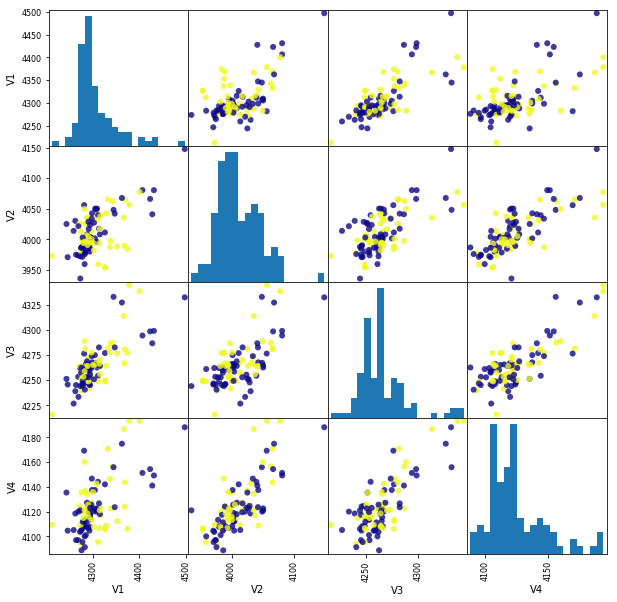

In [9]:
%matplotlib inline
eegs = eeg.sample(n=1000)
_ = pd.plotting.scatter_matrix(
    eegs.iloc[:100,:4], 
    c=eegs[:100]['class'], 
    figsize=(10, 10), 
    marker='o', 
    hist_kwds={'bins': 20}, 
    alpha=.8, 
    cmap='plasma'
)

# Task

The function `openml.evaluation.list_evaluations(...)` returns a dictionary of evaluation records. It has several filtering functions, to keep the resulting set small (keep in mind that OpenML has almost 10 million runs, and more than a billion evaluation records). The function is documented in the [API docs](https://openml.github.io/openml-python/master/generated/openml.evaluations.list_evaluations.html#openml.evaluations.list_evaluations). It returns a dict mapping from `run_id` to [OpenMLEvaluation](https://openml.github.io/openml-python/master/generated/openml.OpenMLEvaluation.html#openml.OpenMLEvaluation). Examples of filters are `task`, `flow` and `function`. Note that one of these is mandatory.

* Obtain a subset of 100 predictive accuracy (`predictive_accuracy`) results on the letter dataset (task id = 6).
* Obtain a subset of 100 predictive accuracy (`predictive_accuracy`) results per task in the OpenML 100 and plot these 

In [ ]:
import seaborn as sns
import pandas as pd
import openml as oml

suite = oml.study.get_study('OpenML100')
scores = []
for task_id in suite.tasks[:10]: # [SPEED] only first 10 tasks
  results = oml.evaluations.list_evaluations(function='predictive_accuracy', task=[task_id], size=100)
  # Download the tasks and plot the scores
  for evaluation in results.values():
    scores.append({"flow": evaluation.flow_name, "score": evaluation.value, "task": evaluation.data_name})
    
sns.violinplot(x="task", y="score", data=pd.DataFrame(scores), scale="width", palette="Set3");

# Dataset Upload

There are various ways to upload a dataset. The most convenient ways are documented in [this example](https://github.com/openml/openml-python/blob/master/examples/create_upload_tutorial.py). Most conveniently, this can be done using a [pandas dataframe](https://github.com/openml/openml-python/blob/a0ef724fec6ab31f6381d3ac2a84827ab535170d/examples/create_upload_tutorial.py#L206). Additionally, we need to create a [OpenMLDataset](https://openml.github.io/openml-python/master/generated/openml.OpenMLDataset.html#openml.OpenMLDataset) object, containing information about the dataset. Most notably, the arguments `name`, `default_target_attribute`, `attributes` and `data` need to be set.

* Find your favorite dataset (on your laptop), load it as pandas dataframe and upload it to OpenML.
* Common problem: Server returns error 131. This means that the description file was not complete. The [XSD](https://github.com/openml/OpenML/blob/master/openml_OS/views/pages/api_new/v1/xsd/openml.data.upload.xsd) for uploading the dataset hints what fields are mandatory.


In [ ]:
data = [
    ['sunny', 85, 85, 'FALSE', 'no'],
    ['sunny', 80, 90, 'TRUE', 'no'],
    ['overcast', 83, 86, 'FALSE', 'yes'],
    ['rainy', 70, 96, 'FALSE', 'yes'],
    ['rainy', 68, 80, 'FALSE', 'yes'],
    ['rainy', 65, 70, 'TRUE', 'no'],
    ['overcast', 64, 65, 'TRUE', 'yes'],
    ['sunny', 72, 95, 'FALSE', 'no'],
    ['sunny', 69, 70, 'FALSE', 'yes'],
    ['rainy', 75, 80, 'FALSE', 'yes'],
    ['sunny', 75, 70, 'TRUE', 'yes'],
    ['overcast', 72, 90, 'TRUE', 'yes'],
    ['overcast', 81, 75, 'FALSE', 'yes'],
    ['rainy', 71, 91, 'TRUE', 'no'],
]

attribute_names = [
    ('outlook', ['sunny', 'overcast', 'rainy']),
    ('temperature', 'REAL'),
    ('humidity', 'REAL'),
    ('windy', ['TRUE', 'FALSE']),
    ('play', ['yes', 'no']),
]

description = (
    'The weather problem is a tiny dataset that we will use repeatedly'
    ' to illustrate machine learning methods. Entirely fictitious, it '
    'supposedly concerns the conditions that are suitable for playing '
    'some unspecified game. In general, instances in a dataset are '
    'characterized by the values of features, or attributes, that measure '
    'different aspects of the instance. In this case there are four '
    'attributes: outlook, temperature, humidity, and windy. '
    'The outcome is whether to play or not.'
)

oml.config.server = 'https://test.openml.org/api/v1/xml'
oml.config.apikey = 'FILL_IN_APIKEY'

df = pd.DataFrame(data, columns=[col_name for col_name, _ in attribute_names])
# enforce the categorical column to have a categorical dtype
df['outlook'] = df['outlook'].astype('category')
df['windy'] = df['windy'].astype('bool')
df['play'] = df['play'].astype('category')
print(df.info())

############################################################################
# We enforce the column 'outlook', 'windy', and 'play' to be a categorical
# dtype while the column 'rnd_str' is kept as a string column. Then, we can
# call :func:`create_dataset` by passing the dataframe and fixing the parameter
# ``attributes`` to ``'auto'``.

weather_dataset = oml.datasets.create_dataset(
    name="Weather",
    description=description,
    default_target_attribute='play',
    attributes='auto',
    data=df, 
    creator=None,
    contributor=None, 
    collection_date=None, 
    language=None, 
    licence=None, 
    ignore_attribute=None, 
    citation=None,
)


upload_did = weather_dataset.publish()
print('URL for dataset: %s/data/%d' % (oml.config.server, upload_did))
